<p align="left">
  <a href="https://colab.research.google.com/github/fernandoarcevega/AI_Workshop/blob/main/Part_2/01_Perceptron/01_Perceptron_pckg.ipynb" target="_parent">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" width="200">
  </a>
</p>

In [ ]:
###############################################
# Author 1: Wilfrido Gómez-Flores (CINVESTAV) #
# Author 2: Fernando Arce-Vega (CIO)          #
# e-mail 1: wilfrido.gomez@cinvestav.mx       #
# e-mail 2: farce@cio.mx                      #
# Date:     nov/03/2025                       #
# Subject:  The perceptron model              #
###############################################

In [ ]:
# Libraries
import numpy as np                       # Numerical array operations
import matplotlib.pyplot as plt          # Data plotting/visualization
import tensorflow as tf                  # Machine learning

In [ ]:
# Dataset
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]]).T  # Inputs
y_and = np.array([0, 0, 0, 1])                              # AND gate
y_or = np.array([0, 1, 1, 1])                               # OR gate
y_xor = np.array([0, 1, 1, 0])                              # XOR gate

In [ ]:
# Check feature and targets shapes
print(f'Features shape: {X.shape}')
print(f'y_and shape:    {y_and.shape}')
print(f'y_or shape:     {y_or.shape}')
print(f'y_xor shape:    {y_xor.shape}')

Features shape: (4, 2)
y_and shape:    (4,)
y_or shape:     (4,)
y_xor shape:    (4,)


Perceptron algorithm:

$$
\begin{align*}
& \textbf{input:} \quad X = \{(\mathbf{x}_i, y_i)|i=1, \dots, n\}, \eta, \varepsilon \\
\\
1: \quad & \mathbf{w} \leftarrow \mathbf{0} \\
2: \quad & \mathbf{g} \leftarrow \mathbf{1} \quad \textit{// Initialize gradient to enter loop} \\
3: \quad & \textbf{while } \mathbf{g} \cdot \mathbf{g} > \varepsilon \textbf{ do} \\
4: \quad & \qquad \mathbf{g} \leftarrow -\frac{1}{n}\sum_{i=1}^{n}(y_i - \mathbf{x}_i\mathbf{w}^T)\mathbf{x}_i \\
5: \quad & \qquad \mathbf{w} \leftarrow \mathbf{w} - \eta \cdot \mathbf{g} \\
\\
& \textbf{return:} \quad \mathbf{w}
\end{align*}
$$

In [ ]:
# Perceptron algorithm
def learn_perceptron(X, y, eps):
    # Model
    model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(units=1, activation='linear')])

    # Compile the model
    optimizer = tf.keras.optimizers.Adam(learning_rate=eps)

    model.compile(
        optimizer=optimizer,
        loss='mse',
        metrics=['mae'])

    # Training model
    epochs = 80

    history = model.fit(X, y,
                    batch_size = 4,
                    epochs = epochs,
                    verbose = 2)
    return model

The derivative of the MSE with respect to **w** is:

$$ \frac{\partial J(\mathbf{w})}{\partial \mathbf{w}} = -\frac{1}{n} \sum_{i=1}^{n} (y_i - \mathbf{x}_i\mathbf{w}^T) \mathbf{x}_i. $$

In [ ]:
# Training Perceptrons
model_and = learn_perceptron(X, y_and, 1e-1)
model_or = learn_perceptron(X, y_or, 1e-1)
model_xor = learn_perceptron(X, y_xor, 1e-1)

Epoch 1/80
1/1 - 1s - 517ms/step - loss: 0.3421 - mae: 0.4806
Epoch 2/80
1/1 - 0s - 40ms/step - loss: 0.1718 - mae: 0.3306
Epoch 3/80
1/1 - 0s - 40ms/step - loss: 0.0930 - mae: 0.2500
Epoch 4/80
1/1 - 0s - 40ms/step - loss: 0.0889 - mae: 0.2616
Epoch 5/80
1/1 - 0s - 40ms/step - loss: 0.1190 - mae: 0.3097
Epoch 6/80
1/1 - 0s - 41ms/step - loss: 0.1419 - mae: 0.3251
Epoch 7/80
1/1 - 0s - 43ms/step - loss: 0.1415 - mae: 0.3145
Epoch 8/80
1/1 - 0s - 47ms/step - loss: 0.1224 - mae: 0.2859
Epoch 9/80
1/1 - 0s - 40ms/step - loss: 0.0964 - mae: 0.2500
Epoch 10/80
1/1 - 0s - 53ms/step - loss: 0.0746 - mae: 0.2500
Epoch 11/80
1/1 - 0s - 43ms/step - loss: 0.0636 - mae: 0.2500
Epoch 12/80
1/1 - 0s - 43ms/step - loss: 0.0647 - mae: 0.2500
Epoch 13/80
1/1 - 0s - 41ms/step - loss: 0.0737 - mae: 0.2500
Epoch 14/80
1/1 - 0s - 44ms/step - loss: 0.0840 - mae: 0.2500
Epoch 15/80
1/1 - 0s - 44ms/step - loss: 0.0898 - mae: 0.2500
Epoch 16/80
1/1 - 0s - 41ms/step - loss: 0.0889 - mae: 0.2500
Epoch 17/80
1/1 

In [ ]:
# Getting weights & bias
def get_weights(model):
    weights, w_0 = model.layers[0].get_weights()
    w_1, w_2 = weights[0], weights[1]

    return float(w_0[0]), float(w_1[0]), float(w_2[0])

In [ ]:
# Getting weights & bias
w_0_and, w_1_and, w_2_and = get_weights(model_and)
w_0_or, w_1_or, w_2_or = get_weights(model_or)
w_0_xor, w_1_xor, w_2_xor = get_weights(model_or)

# Perceptron weights
print(f'AND weights: w0={w_0_and:.2f}, w1={w_1_and:.2f},  w2={w_2_and:.2f}')
print(f'OR weights:  w0={w_0_or:.2f},  w1={w_1_or:.2f},  w2={w_2_or:.2f}')
print(f'XOR weights: w0={w_0_xor:.2f},  w1={w_1_xor:.2f},  w2={w_2_xor:.2f}')

AND weights: w0=-0.25, w1=0.50,  w2=0.50
OR weights:  w0=0.25,  w1=0.50,  w2=0.49
XOR weights: w0=0.25,  w1=0.50,  w2=0.49


In [ ]:
# Meshgrid
s = 300
X1, X2 = np.meshgrid(np.linspace(-0.1, 1.1, s), np.linspace(-0.1, 1.1, s))
Xt = np.c_[X1.ravel(), X2.ravel()]

The neuron's output is

$$ y = \varphi \left( w_0 + \sum_{i=1}^{d} w_i x_i \right), \quad \text{where} \quad \varphi(u) = \begin{cases} 1 & \text{if } u \ge 0.5, \\ 0 & \text{otherwise.} \end{cases} $$

In [ ]:
# Decision boundaries
Y1 = (model_and.predict(Xt) >= 0.5).reshape(s, s)    # And
Y2 = (model_or.predict(Xt) >= 0.5).reshape(s, s)     # Or
Y3 = (model_xor.predict(Xt) >= 0.5).reshape(s, s)    # Xor

2813/2813 ━━━━━━━━━━━━━━━━━━━━ 3s 902us/step
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 3s 906us/step
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


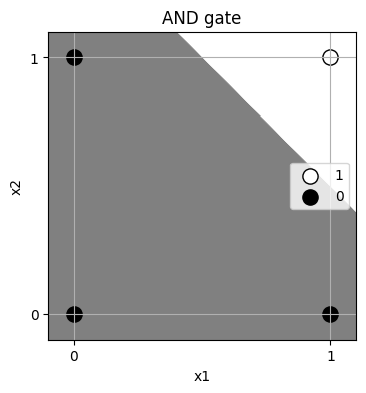

In [ ]:
# And gate decision boundary
plt.figure(figsize=(6, 4))
plt.imshow(Y1, extent=(-0.1, 1.1, -0.1, 1.1), origin='lower', cmap='gray', alpha=0.5)
plt.scatter(X[y_and == 1, 0], X[y_and == 1, 1], edgecolor='k', facecolor='w', s=120, label='1')
plt.scatter(X[y_and == 0, 0], X[y_and == 0, 1], edgecolor='k', facecolor='k', s=120, label='0')
plt.axis([-0.1, 1.1, -0.1, 1.1])
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.xticks([0, 1])
plt.yticks([0, 1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('AND gate')
plt.legend(loc='center right')
plt.show()

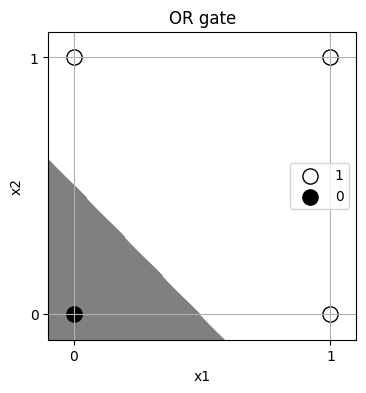

In [ ]:
# Or gate decision boundary
plt.figure(figsize=(6, 4))
plt.imshow(Y2, extent=(-0.1, 1.1, -0.1, 1.1), origin='lower', cmap='gray', alpha=0.5)
plt.scatter(X[y_or == 1, 0], X[y_or == 1, 1], edgecolor='k', facecolor='w', s=120, label='1')
plt.scatter(X[y_or == 0, 0], X[y_or == 0, 1], edgecolor='k', facecolor='k', s=120, label='0')
plt.axis([-0.1, 1.1, -0.1, 1.1])
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.xticks([0, 1])
plt.yticks([0, 1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('OR gate')
plt.legend(loc='center right')
plt.show()

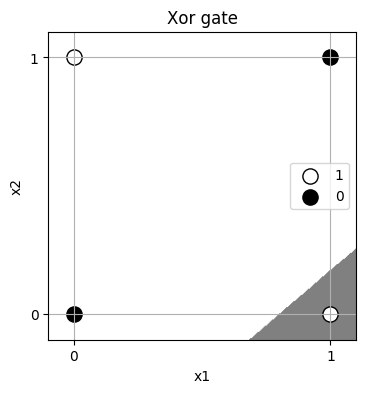

In [ ]:
# X0r gate decision boundary
plt.figure(figsize=(6, 4))
plt.imshow(Y3, extent=(-0.1, 1.1, -0.1, 1.1), origin='lower', cmap='gray', alpha=0.5)
plt.scatter(X[y_xor == 1, 0], X[y_xor == 1, 1], edgecolor='k', facecolor='w', s=120, label='1')
plt.scatter(X[y_xor == 0, 0], X[y_xor == 0, 1], edgecolor='k', facecolor='k', s=120, label='0')
plt.axis([-0.1, 1.1, -0.1, 1.1])
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.xticks([0, 1])
plt.yticks([0, 1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Xor gate')
plt.legend(loc='center right')
plt.show()